## AIM:

To make a model which defines the status of a pokemon.<br>
Goal is to achieve 98% accuracy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Predicting if a pokemon is normal, pseudo legendary, legendary or mythical given the prompts

In [3]:
df= pd.read_csv("pokedex_(Update_05.20).csv")
df.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [4]:
df.shape

(1028, 51)

In [10]:
df.tail(5)

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1023,1023,888,Zacian Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fairy,...,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,1024,889,Zamazenta Crowned Shield,NaN,NaN,8,Legendary,Warrior Pokémon,2,Fighting,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,1025,889,Zamazenta Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fighting,...,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


In [6]:
df.isna().sum()

Unnamed: 0            0
pokedex_number        0
name                  0
german_name          90
japanese_name        90
generation            0
status                0
species               0
type_number           0
type_1                0
type_2              486
height_m              0
weight_kg             1
abilities_number      0
ability_1             3
ability_2           515
ability_hidden      218
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
catch_rate          104
base_friendship     104
base_experience     104
growth_rate           1
egg_type_number       0
egg_type_1            3
egg_type_2          746
percentage_male     236
egg_cycles            1
against_normal        0
against_fire          0
against_water         0
against_electric      0
against_grass         0
against_ice           0
against_fight         0
against_poison        0
against_ground  

In [9]:
df['status'].unique()

array(['Normal', 'Pseudo Legendary', 'Legendary', 'Mythical'],
      dtype=object)

In [8]:
df['status']=df['status'].apply(lambda x: "Pseudo Legendary" if x == "Sub Legendary" else x)

### Dropping unnecesaary columns

In [18]:
# df.drop(columns=[x for x in df.columns if "against" in x], inplace=True)
# df.drop(columns= ["japanese_name", 'german_name','base_friendship','ability_1', 'ability_2', 
#                   'ability_hidden',"abilities_number" , 'base_experience', 'egg_type_number','egg_type_1', 
#                   'egg_type_2', 'percentage_male', 'egg_cycles', "species", "type_number"], inplace=True)
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,Bulbasaur,1,Normal,Grass,Poison,0.7,6.9,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,Medium Slow
1,2,Ivysaur,1,Normal,Grass,Poison,1.0,13.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,Medium Slow
2,3,Venusaur,1,Normal,Grass,Poison,2.0,100.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,Medium Slow
3,3,Mega Venusaur,1,Normal,Grass,Poison,2.4,155.5,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,Medium Slow
4,4,Charmander,1,Normal,Fire,NaN,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,Medium Slow


In [19]:
df['total_points']

0        318.0
1        405.0
2        525.0
3        625.0
4        309.0
         ...  
1023     670.0
1024     720.0
1025     670.0
1026     690.0
1027    1125.0
Name: total_points, Length: 1028, dtype: float64

### Converting data to numerical

In [20]:
df.shape

(1028, 17)

In [21]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'growth_rate'],
      dtype='object')

In [23]:
df.drop('name', axis=1, inplace=True)

In [24]:
df.head()

,pokedex_number,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,1,Normal,Grass,Poison,0.7,6.9,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,Medium Slow
1,2,1,Normal,Grass,Poison,1.0,13.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,Medium Slow
2,3,1,Normal,Grass,Poison,2.0,100.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,Medium Slow
3,3,1,Normal,Grass,Poison,2.4,155.5,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,Medium Slow
4,4,1,Normal,Fire,NaN,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,Medium Slow


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pokedex_number  1028 non-null   int64  
 1   generation      1028 non-null   int64  
 2   status          1028 non-null   object 
 3   type_1          1028 non-null   object 
 4   type_2          542 non-null    object 
 5   height_m        1028 non-null   float64
 6   weight_kg       1027 non-null   float64
 7   total_points    1028 non-null   float64
 8   hp              1028 non-null   float64
 9   attack          1028 non-null   float64
 10  defense         1028 non-null   float64
 11  sp_attack       1028 non-null   float64
 12  sp_defense      1028 non-null   float64
 13  speed           1028 non-null   float64
 14  catch_rate      924 non-null    float64
 15  growth_rate     1027 non-null   object 
dtypes: float64(10), int64(2), object(4)
memory usage: 128.6+ KB


In [34]:
df['type_2'].isna().sum()

0

In [33]:
df['type_2']=df['type_2'].fillna("none")

In [37]:
df.isna().sum()

pokedex_number      0
generation          0
status              0
type_1              0
type_2              0
height_m            0
weight_kg           0
total_points        0
hp                  0
attack              0
defense             0
sp_attack           0
sp_defense          0
speed               0
catch_rate        104
growth_rate         1
dtype: int64

In [36]:
df['weight_kg'].fillna(np.mean(df['weight_kg']), inplace=True)

In [38]:
df['catch_rate']

0       45.0
1       45.0
2       45.0
3       45.0
4       45.0
        ... 
1023     NaN
1024     NaN
1025     NaN
1026     NaN
1027     NaN
Name: catch_rate, Length: 1028, dtype: float64

In [43]:
df.tail(20)

,pokedex_number,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
1008,876,8,Normal,Psychic,Normal,0.9,28.000000,475.0,60.0,65.0,55.0,105.0,95.0,95.0,100.0,Fast
1009,876,8,Normal,Psychic,Normal,0.9,28.000000,475.0,70.0,55.0,65.0,95.0,105.0,85.0,100.0,Fast
1010,877,8,Normal,Electric,Dark,0.3,3.000000,436.0,58.0,95.0,58.0,70.0,58.0,97.0,100.0,Medium Fast
1011,877,8,Normal,Electric,Dark,0.3,3.000000,436.0,58.0,95.0,58.0,70.0,58.0,97.0,100.0,Medium Fast
1012,878,8,Normal,Steel,none,1.2,100.000000,330.0,72.0,80.0,49.0,40.0,49.0,40.0,100.0,Medium Fast
1013,879,8,Normal,Steel,none,3.0,650.000000,500.0,122.0,130.0,69.0,80.0,69.0,30.0,100.0,Medium Fast
1014,880,8,Normal,Electric,Dragon,1.8,190.000000,505.0,90.0,100.0,90.0,80.0,70.0,75.0,100.0,Slow
1015,881,8,Normal,Electric,Ice,2.3,150.000000,505.0,90.0,100.0,90.0,90.0,80.0,55.0,100.0,Slow
1016,882,8,Normal,Water,Dragon,2.3,215.000000,505.0,90.0,90.0,100.0,70.0,80.0,75.0,100.0,Slow
1017,883,8,Normal,Water,Ice,2.0,175.000000,505.0,90.0,90.0,100.0,80.0,90.0,55.0,100.0,Slow


### Filling the missing catch_rates

In [42]:
df['catch_rate'].fillna(df['status'].apply(lambda x:3 if x == "Legendary" or x == "Pseudo Legendary" else 100), inplace=True)

In [56]:
df_test=df

In [44]:
categorical_features=["status","type_1", "type_2","growth_rate"]
categorical_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='none')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### Type definition

* 0: none
* 1: Normal
* 2: Fire
* 3: Water
* 4: Electric
* 5: Grass
* 6: Ice
* 7: Fighting
* 8: Posion
* 9: Ground
* 10: Flying
* 11: Psychic
* 12: Bug
* 13: Rock
* 14: Ghost
* 15: Dragon
* 16: Dark
* 17: Steel
* 18: Fairy

In [57]:
# df_test['type_1']=df_test['type_1'].apply(lambda x: [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18] if x == ["none", "Normal", "Fire", "Water",
#                                                                                       "Electric","Grass","Ice",
#                                                                                       "Fighting","Poison","Ground",
#                                                                                       "Flying","Psychic","Bug",
#                                                                                       "Rock","Ghost","Dragon","Dark","Steel",
#                                                                                       "Fairy"] else x)

In [60]:
type_array= np.array(["none", "Normal", "Fire", "Water","Electric","Grass","Ice","Fighting","Poison","Ground","Flying","Psychic","Bug",
                                                                                      "Rock","Ghost","Dragon","Dark","Steel",
                                                                                       "Fairy"])


In [61]:
type_array

array(['none', 'Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice',
       'Fighting', 'Poison', 'Ground', 'Flying', 'Psychic', 'Bug', 'Rock',
       'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy'], dtype='<U8')

### Types to numbers

In [63]:
for i in range(0, len(df)):
    for j in range(0, len(type_array)):
        df['type_1']=df['type_1'].apply(lambda x: j if x==type_array[j] else x)
        df['type_2']=df['type_2'].apply(lambda x: j if x==type_array[j] else x)
        
df

,pokedex_number,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,1,Normal,5,8,0.7,6.900000,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,Medium Slow
1,2,1,Normal,5,8,1.0,13.000000,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,Medium Slow
2,3,1,Normal,5,8,2.0,100.000000,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,Medium Slow
3,3,1,Normal,5,8,2.4,155.500000,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,Medium Slow
4,4,1,Normal,2,0,0.6,8.500000,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,Medium Slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,8,Legendary,18,0,2.8,110.000000,670.0,92.0,130.0,115.0,80.0,115.0,138.0,3.0,Slow
1024,889,8,Legendary,7,17,2.9,785.000000,720.0,92.0,130.0,145.0,80.0,145.0,128.0,3.0,Slow
1025,889,8,Legendary,7,0,2.9,210.000000,670.0,92.0,130.0,115.0,80.0,115.0,138.0,3.0,Slow
1026,890,8,Legendary,8,15,20.0,950.000000,690.0,140.0,85.0,95.0,145.0,95.0,130.0,3.0,Slow


In [65]:
df['type_1'].unique(), df['type_2'].unique()

(array([ 5,  2,  3, 12,  1, 16,  8,  4,  9,  6, 18, 17,  7, 11, 13, 14, 15,
        10], dtype=int64),
 array([ 8,  0, 10, 15,  1, 11, 17,  9, 18,  5,  7,  4,  6, 16, 14, 13,  3,
         2, 12], dtype=int64))

In [66]:
df.head()

,pokedex_number,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,1,Normal,5,8,0.7,6.9,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,Medium Slow
1,2,1,Normal,5,8,1.0,13.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,Medium Slow
2,3,1,Normal,5,8,2.0,100.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,Medium Slow
3,3,1,Normal,5,8,2.4,155.5,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,Medium Slow
4,4,1,Normal,2,0,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,Medium Slow


## Plotting some graphs for visualization

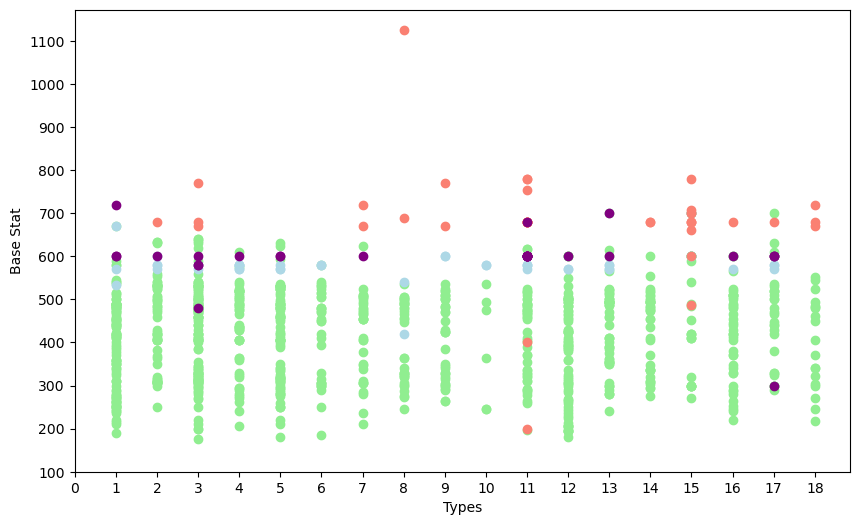

In [81]:
fig, ax= plt.subplots(figsize=(10,6))
ax.scatter(df['type_1'][df['status']=='Normal'], df['total_points'][df['status']=='Normal'], c='lightgreen')
ax.scatter(df['type_1'][df['status']=='Pseudo Legendary'], df['total_points'][df['status']=='Pseudo Legendary'], c='lightblue')
ax.scatter(df['type_1'][df['status']=='Legendary'], df['total_points'][df['status']=='Legendary'], c='salmon')
ax.scatter(df['type_1'][df['status']=='Mythical'], df['total_points'][df['status']=='Mythical'], c='purple')
ax.set(xlabel="Types", ylabel="Base Stat")
plt.xticks(np.arange(0,19));
plt.yticks(np.arange(100,1200,100));

In [82]:
## Converting status
status_array=["Normal", "Pseudo Legendary", "Legendary", "Mythical"]

In [83]:
for i in range(0, len(df)):
    for j in range(0, len(status_array)):
        df['status']=df['status'].apply(lambda x: j if x==status_array[j] else x)

df

,pokedex_number,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,1,0,5,8,0.7,6.900000,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,Medium Slow
1,2,1,0,5,8,1.0,13.000000,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,Medium Slow
2,3,1,0,5,8,2.0,100.000000,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,Medium Slow
3,3,1,0,5,8,2.4,155.500000,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,Medium Slow
4,4,1,0,2,0,0.6,8.500000,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,Medium Slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,8,2,18,0,2.8,110.000000,670.0,92.0,130.0,115.0,80.0,115.0,138.0,3.0,Slow
1024,889,8,2,7,17,2.9,785.000000,720.0,92.0,130.0,145.0,80.0,145.0,128.0,3.0,Slow
1025,889,8,2,7,0,2.9,210.000000,670.0,92.0,130.0,115.0,80.0,115.0,138.0,3.0,Slow
1026,890,8,2,8,15,20.0,950.000000,690.0,140.0,85.0,95.0,145.0,95.0,130.0,3.0,Slow


In [85]:
df.groupby(['pokedex_number']).mean(numeric_only=True)

,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate
pokedex_number,,,,,,,,,,,,,,
1,1.0,0.0,5.0,8.0,0.7,6.900000,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0
2,1.0,0.0,5.0,8.0,1.0,13.000000,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0
3,1.0,0.0,5.0,8.0,2.2,127.750000,575.0,80.0,91.0,103.0,111.0,110.0,80.0,45.0
4,1.0,0.0,2.0,0.0,0.6,8.500000,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0
5,1.0,0.0,2.0,0.0,1.1,19.000000,405.0,58.0,64.0,58.0,80.0,65.0,80.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,8.0,0.0,15.0,14.0,1.4,11.000000,410.0,68.0,80.0,50.0,60.0,50.0,102.0,100.0
887,8.0,0.0,15.0,14.0,3.0,50.000000,600.0,88.0,120.0,75.0,100.0,75.0,142.0,100.0
888,8.0,2.0,18.0,8.5,2.8,232.500000,695.0,92.0,150.0,115.0,80.0,115.0,143.0,3.0


In [86]:
df.corr()

C:\Users\Zardian\AppData\Local\Temp\ipykernel_12836\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,pokedex_number,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate
pokedex_number,1.000000,0.987363,0.184312,0.152009,0.066678,0.065249,0.105168,0.123960,0.103872,0.111108,0.095951,0.093608,0.085762,0.009163,-0.105584
generation,0.987363,1.000000,0.124023,0.117775,0.055979,0.053983,0.069290,0.068375,0.069593,0.071636,0.054243,0.051468,0.042590,-0.013840,-0.062608
status,0.184312,0.124023,1.000000,0.122725,0.082344,0.204729,0.346223,0.488600,0.301123,0.329965,0.256714,0.415521,0.333479,0.330137,-0.345773
type_1,0.152009,0.117775,0.122725,1.000000,0.111405,0.031461,0.150828,0.095592,-0.041981,0.090290,0.218573,0.032368,0.114573,-0.043704,-0.108463
type_2,0.066678,0.055979,0.082344,0.111405,1.000000,0.105125,0.129851,0.212728,0.084955,0.154913,0.215113,0.156689,0.168140,0.068757,-0.146959
height_m,0.065249,0.053983,0.204729,0.031461,0.105125,1.000000,0.273091,0.375629,0.378987,0.205641,0.306427,0.202691,0.309210,0.139065,-0.177907
weight_kg,0.105168,0.069290,0.346223,0.150828,0.129851,0.273091,1.000000,0.471010,0.434755,0.417601,0.458142,0.245198,0.291003,0.060032,-0.306306
total_points,0.123960,0.068375,0.488600,0.095592,0.212728,0.375629,0.471010,1.000000,0.650141,0.733509,0.631085,0.733534,0.721923,0.562561,-0.700291
hp,0.103872,0.069593,0.301123,-0.041981,0.084955,0.378987,0.434755,0.650141,1.000000,0.442992,0.302593,0.369335,0.399167,0.188629,-0.453590
attack,0.111108,0.071636,0.329965,0.090290,0.154913,0.205641,0.417601,0.733509,0.442992,1.000000,0.450766,0.376205,0.264264,0.381040,-0.503164


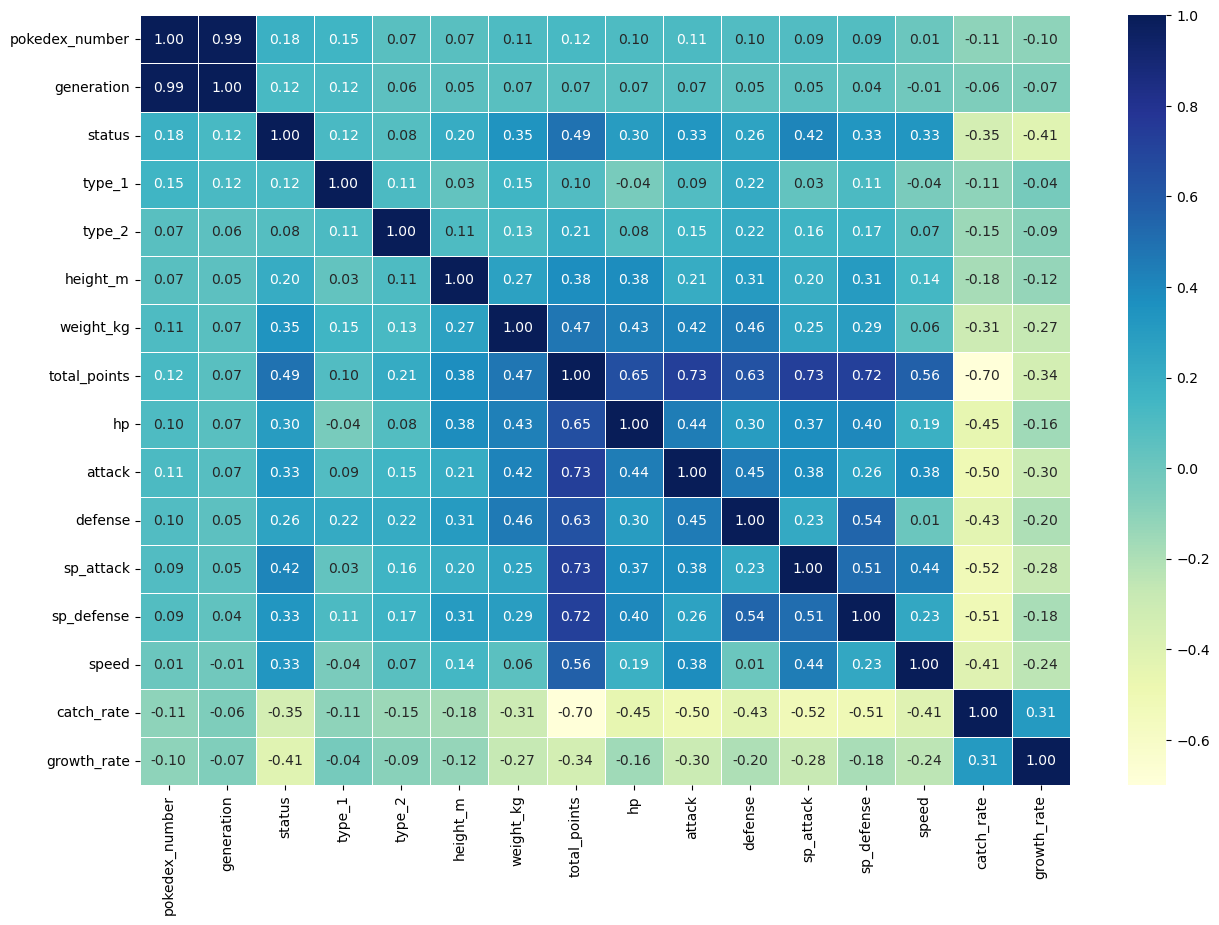

In [102]:
import seaborn as sns

fig, ax =plt.subplots(figsize=(15,10))
ax= sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu');

In [120]:
df['growth_rate'].unique()

array([1., 2., 3., 0., 5., 4.])

In [119]:
df['growth_rate'].fillna(0, inplace=True)

In [116]:
growth_array= np.array(['Slow', 'Medium Slow', 'Medium Fast', 'Fast', 'Erratic', 'Fluctuating','nan'])

In [117]:
for i in range(0, len(df)):
    for j in range(0, len(growth_array)):
        df['growth_rate']=df['growth_rate'].apply(lambda x: j if x==growth_array[j] else x)

df

,pokedex_number,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,1,0,5,8,0.7,6.900000,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,1.0
1,2,1,0,5,8,1.0,13.000000,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,1.0
2,3,1,0,5,8,2.0,100.000000,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,1.0
3,3,1,0,5,8,2.4,155.500000,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,1.0
4,4,1,0,2,0,0.6,8.500000,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,8,2,18,0,2.8,110.000000,670.0,92.0,130.0,115.0,80.0,115.0,138.0,3.0,0.0
1024,889,8,2,7,17,2.9,785.000000,720.0,92.0,130.0,145.0,80.0,145.0,128.0,3.0,0.0
1025,889,8,2,7,0,2.9,210.000000,670.0,92.0,130.0,115.0,80.0,115.0,138.0,3.0,0.0
1026,890,8,2,8,15,20.0,950.000000,690.0,140.0,85.0,95.0,145.0,95.0,130.0,3.0,0.0


In [175]:
df.head(100)

,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,0,5,8,0.7,6.9,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,1.0
1,1,0,5,8,1.0,13.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,1.0
2,1,0,5,8,2.0,100.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,1.0
3,1,0,5,8,2.4,155.5,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,1.0
4,1,0,2,0,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,13,9,1.0,105.0,390.0,55.0,95.0,115.0,45.0,45.0,35.0,120.0,1.0
96,1,0,13,4,1.0,110.0,390.0,55.0,95.0,115.0,45.0,45.0,35.0,120.0,1.0
97,1,0,13,9,1.4,300.0,495.0,80.0,120.0,130.0,55.0,65.0,45.0,45.0,1.0
98,1,0,13,4,1.7,316.0,495.0,80.0,120.0,130.0,55.0,65.0,45.0,45.0,1.0


In [174]:
df.drop('pokedex_number', axis=1, inplace=True)

now splitting the data

In [176]:
X= df.drop('status', axis=1)
y=df['status']

In [177]:
X

,generation,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,5,8,0.7,6.900000,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,1.0
1,1,5,8,1.0,13.000000,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,1.0
2,1,5,8,2.0,100.000000,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,1.0
3,1,5,8,2.4,155.500000,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,1.0
4,1,2,0,0.6,8.500000,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,8,18,0,2.8,110.000000,670.0,92.0,130.0,115.0,80.0,115.0,138.0,3.0,0.0
1024,8,7,17,2.9,785.000000,720.0,92.0,130.0,145.0,80.0,145.0,128.0,3.0,0.0
1025,8,7,0,2.9,210.000000,670.0,92.0,130.0,115.0,80.0,115.0,138.0,3.0,0.0
1026,8,8,15,20.0,950.000000,690.0,140.0,85.0,95.0,145.0,95.0,130.0,3.0,0.0


In [178]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1023    2
1024    2
1025    2
1026    2
1027    2
Name: status, Length: 1028, dtype: int64

In [179]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

In [181]:
models={
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "GNaive Bayes": GaussianNB(),
    "Catboost": CatBoostClassifier()
}

def fit_and_train(models, X_train, X_test, y_train, y_test):
    """
    Input the model and it will train it.
    models: a dictionary of models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_training: training data (labels)
    y_test: testing data (labels)
    """
    np.random.seed(42)
    model_scores={}
    
    for name, model in models.items():
        print('Training on ', name,"...")
        model.fit(X_train, y_train)
        print("Testing model...")
        model_scores[name]=model.score(X_test,y_test)
        print("-------------------------------------")
    
    return model_scores

In [182]:
fit_and_train(models, X_train, X_test, y_train, y_test)

Training on  Logistic Regression ...
Testing model...
-------------------------------------
Training on  KNN ...
Testing model...
-------------------------------------
Training on  Random Forest ...


D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing model...
-------------------------------------
Training on  SVC ...
Testing model...
-------------------------------------
Training on  GNaive Bayes ...
Testing model...
-------------------------------------
Training on  Catboost ...
Learning rate set to 0.07834
0:	learn: 1.2220179	total: 15.1ms	remaining: 15.1s
1:	learn: 1.0902814	total: 27.2ms	remaining: 13.6s
2:	learn: 0.9830376	total: 39.4ms	remaining: 13.1s
3:	learn: 0.8857801	total: 51.6ms	remaining: 12.9s
4:	learn: 0.8081111	total: 65.7ms	remaining: 13.1s
5:	learn: 0.7390911	total: 79.1ms	remaining: 13.1s
6:	learn: 0.6832394	total: 94.1ms	remaining: 13.3s
7:	learn: 0.6347146	total: 110ms	remaining: 13.6s
8:	learn: 0.5921424	total: 124ms	remaining: 13.6s
9:	learn: 0.5533037	total: 139ms	remaining: 13.7s
10:	learn: 0.5192235	total: 153ms	remaining: 13.8s
11:	learn: 0.4876369	total: 166ms	remaining: 13.7s
12:	learn: 0.4606839	total: 178ms	remaining: 13.5s
13:	learn: 0.4350410	total: 186ms	remaining: 13.1s
14:	learn: 0.41202

156:	learn: 0.0495105	total: 814ms	remaining: 4.37s
157:	learn: 0.0489976	total: 818ms	remaining: 4.36s
158:	learn: 0.0485694	total: 822ms	remaining: 4.35s
159:	learn: 0.0482978	total: 827ms	remaining: 4.34s
160:	learn: 0.0479688	total: 832ms	remaining: 4.33s
161:	learn: 0.0478244	total: 836ms	remaining: 4.32s
162:	learn: 0.0475881	total: 841ms	remaining: 4.32s
163:	learn: 0.0474586	total: 845ms	remaining: 4.31s
164:	learn: 0.0473293	total: 849ms	remaining: 4.3s
165:	learn: 0.0469854	total: 853ms	remaining: 4.29s
166:	learn: 0.0465694	total: 859ms	remaining: 4.28s
167:	learn: 0.0462399	total: 863ms	remaining: 4.27s
168:	learn: 0.0458521	total: 867ms	remaining: 4.26s
169:	learn: 0.0456375	total: 870ms	remaining: 4.25s
170:	learn: 0.0452177	total: 875ms	remaining: 4.24s
171:	learn: 0.0447961	total: 879ms	remaining: 4.23s
172:	learn: 0.0445130	total: 882ms	remaining: 4.22s
173:	learn: 0.0440735	total: 886ms	remaining: 4.21s
174:	learn: 0.0440273	total: 890ms	remaining: 4.2s
175:	learn: 0.

356:	learn: 0.0183091	total: 1.59s	remaining: 2.87s
357:	learn: 0.0182413	total: 1.59s	remaining: 2.86s
358:	learn: 0.0181677	total: 1.6s	remaining: 2.85s
359:	learn: 0.0181378	total: 1.6s	remaining: 2.85s
360:	learn: 0.0180746	total: 1.6s	remaining: 2.84s
361:	learn: 0.0180105	total: 1.61s	remaining: 2.84s
362:	learn: 0.0179621	total: 1.63s	remaining: 2.85s
363:	learn: 0.0178721	total: 1.64s	remaining: 2.87s
364:	learn: 0.0177877	total: 1.66s	remaining: 2.88s
365:	learn: 0.0177506	total: 1.67s	remaining: 2.9s
366:	learn: 0.0176725	total: 1.69s	remaining: 2.91s
367:	learn: 0.0176545	total: 1.7s	remaining: 2.92s
368:	learn: 0.0175862	total: 1.72s	remaining: 2.94s
369:	learn: 0.0175007	total: 1.73s	remaining: 2.95s
370:	learn: 0.0174124	total: 1.74s	remaining: 2.95s
371:	learn: 0.0173717	total: 1.75s	remaining: 2.95s
372:	learn: 0.0172981	total: 1.75s	remaining: 2.95s
373:	learn: 0.0172652	total: 1.76s	remaining: 2.95s
374:	learn: 0.0172058	total: 1.77s	remaining: 2.94s
375:	learn: 0.017

548:	learn: 0.0105161	total: 2.46s	remaining: 2.02s
549:	learn: 0.0105058	total: 2.47s	remaining: 2.02s
550:	learn: 0.0104904	total: 2.47s	remaining: 2.02s
551:	learn: 0.0104711	total: 2.48s	remaining: 2.01s
552:	learn: 0.0104403	total: 2.48s	remaining: 2s
553:	learn: 0.0104211	total: 2.48s	remaining: 2s
554:	learn: 0.0103929	total: 2.49s	remaining: 2s
555:	learn: 0.0103808	total: 2.49s	remaining: 1.99s
556:	learn: 0.0103510	total: 2.5s	remaining: 1.99s
557:	learn: 0.0103172	total: 2.5s	remaining: 1.98s
558:	learn: 0.0102906	total: 2.51s	remaining: 1.98s
559:	learn: 0.0102801	total: 2.51s	remaining: 1.97s
560:	learn: 0.0102430	total: 2.52s	remaining: 1.97s
561:	learn: 0.0102255	total: 2.52s	remaining: 1.96s
562:	learn: 0.0102043	total: 2.52s	remaining: 1.96s
563:	learn: 0.0101656	total: 2.53s	remaining: 1.95s
564:	learn: 0.0101606	total: 2.53s	remaining: 1.95s
565:	learn: 0.0101533	total: 2.53s	remaining: 1.94s
566:	learn: 0.0101399	total: 2.54s	remaining: 1.94s
567:	learn: 0.0101231	t

713:	learn: 0.0075541	total: 3.08s	remaining: 1.23s
714:	learn: 0.0075430	total: 3.08s	remaining: 1.23s
715:	learn: 0.0075274	total: 3.08s	remaining: 1.22s
716:	learn: 0.0075125	total: 3.09s	remaining: 1.22s
717:	learn: 0.0074976	total: 3.09s	remaining: 1.21s
718:	learn: 0.0074741	total: 3.1s	remaining: 1.21s
719:	learn: 0.0074669	total: 3.1s	remaining: 1.21s
720:	learn: 0.0074475	total: 3.1s	remaining: 1.2s
721:	learn: 0.0074250	total: 3.11s	remaining: 1.2s
722:	learn: 0.0074081	total: 3.11s	remaining: 1.19s
723:	learn: 0.0074000	total: 3.12s	remaining: 1.19s
724:	learn: 0.0073881	total: 3.12s	remaining: 1.18s
725:	learn: 0.0073752	total: 3.13s	remaining: 1.18s
726:	learn: 0.0073645	total: 3.13s	remaining: 1.18s
727:	learn: 0.0073562	total: 3.13s	remaining: 1.17s
728:	learn: 0.0073404	total: 3.14s	remaining: 1.17s
729:	learn: 0.0073360	total: 3.14s	remaining: 1.16s
730:	learn: 0.0073313	total: 3.15s	remaining: 1.16s
731:	learn: 0.0073147	total: 3.15s	remaining: 1.15s
732:	learn: 0.007

921:	learn: 0.0054871	total: 3.87s	remaining: 327ms
922:	learn: 0.0054820	total: 3.87s	remaining: 323ms
923:	learn: 0.0054744	total: 3.87s	remaining: 319ms
924:	learn: 0.0054693	total: 3.88s	remaining: 314ms
925:	learn: 0.0054612	total: 3.88s	remaining: 310ms
926:	learn: 0.0054570	total: 3.88s	remaining: 306ms
927:	learn: 0.0054525	total: 3.89s	remaining: 302ms
928:	learn: 0.0054476	total: 3.89s	remaining: 298ms
929:	learn: 0.0054368	total: 3.9s	remaining: 293ms
930:	learn: 0.0054312	total: 3.9s	remaining: 289ms
931:	learn: 0.0054208	total: 3.9s	remaining: 285ms
932:	learn: 0.0054110	total: 3.91s	remaining: 281ms
933:	learn: 0.0054040	total: 3.91s	remaining: 276ms
934:	learn: 0.0054002	total: 3.92s	remaining: 272ms
935:	learn: 0.0053913	total: 3.92s	remaining: 268ms
936:	learn: 0.0053856	total: 3.92s	remaining: 264ms
937:	learn: 0.0053765	total: 3.93s	remaining: 260ms
938:	learn: 0.0053714	total: 3.93s	remaining: 255ms
939:	learn: 0.0053644	total: 3.94s	remaining: 251ms
940:	learn: 0.0

{'Logistic Regression': 0.9271844660194175,
 'KNN': 0.9660194174757282,
 'Random Forest': 0.9854368932038835,
 'SVC': 0.9223300970873787,
 'GNaive Bayes': 0.912621359223301,
 'Catboost': 0.9902912621359223}

In [128]:
# Here, we can see catboost with 99.51 percent accuracy

In [183]:
model_scores= fit_and_train(models, X_train,X_test, y_train, y_test)

Training on  Logistic Regression ...
Testing model...
-------------------------------------
Training on  KNN ...
Testing model...
-------------------------------------
Training on  Random Forest ...


D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing model...
-------------------------------------
Training on  SVC ...
Testing model...
-------------------------------------
Training on  GNaive Bayes ...
Testing model...
-------------------------------------
Training on  Catboost ...
Learning rate set to 0.07834
0:	learn: 1.2220179	total: 6.46ms	remaining: 6.45s
1:	learn: 1.0902814	total: 12.3ms	remaining: 6.14s
2:	learn: 0.9830376	total: 18.4ms	remaining: 6.12s
3:	learn: 0.8857801	total: 25.4ms	remaining: 6.32s
4:	learn: 0.8081111	total: 34.3ms	remaining: 6.83s
5:	learn: 0.7390911	total: 45.8ms	remaining: 7.59s
6:	learn: 0.6832394	total: 59.8ms	remaining: 8.48s
7:	learn: 0.6347146	total: 74.9ms	remaining: 9.28s
8:	learn: 0.5921424	total: 87.7ms	remaining: 9.65s
9:	learn: 0.5533037	total: 102ms	remaining: 10.1s
10:	learn: 0.5192235	total: 116ms	remaining: 10.4s
11:	learn: 0.4876369	total: 128ms	remaining: 10.5s
12:	learn: 0.4606839	total: 142ms	remaining: 10.8s
13:	learn: 0.4350410	total: 154ms	remaining: 10.8s
14:	learn: 0.412

176:	learn: 0.0435033	total: 870ms	remaining: 4.05s
177:	learn: 0.0431437	total: 875ms	remaining: 4.04s
178:	learn: 0.0429400	total: 879ms	remaining: 4.03s
179:	learn: 0.0424445	total: 884ms	remaining: 4.03s
180:	learn: 0.0423663	total: 888ms	remaining: 4.02s
181:	learn: 0.0421811	total: 891ms	remaining: 4.01s
182:	learn: 0.0421151	total: 895ms	remaining: 4s
183:	learn: 0.0420092	total: 900ms	remaining: 3.99s
184:	learn: 0.0418397	total: 904ms	remaining: 3.98s
185:	learn: 0.0414294	total: 907ms	remaining: 3.97s
186:	learn: 0.0410931	total: 911ms	remaining: 3.96s
187:	learn: 0.0410324	total: 915ms	remaining: 3.95s
188:	learn: 0.0408270	total: 918ms	remaining: 3.94s
189:	learn: 0.0404395	total: 922ms	remaining: 3.93s
190:	learn: 0.0403110	total: 926ms	remaining: 3.92s
191:	learn: 0.0397758	total: 929ms	remaining: 3.91s
192:	learn: 0.0395451	total: 933ms	remaining: 3.9s
193:	learn: 0.0394772	total: 936ms	remaining: 3.89s
194:	learn: 0.0390350	total: 940ms	remaining: 3.88s
195:	learn: 0.03

382:	learn: 0.0166134	total: 1.66s	remaining: 2.68s
383:	learn: 0.0165769	total: 1.67s	remaining: 2.67s
384:	learn: 0.0165119	total: 1.67s	remaining: 2.67s
385:	learn: 0.0164932	total: 1.68s	remaining: 2.67s
386:	learn: 0.0164309	total: 1.68s	remaining: 2.66s
387:	learn: 0.0163816	total: 1.68s	remaining: 2.65s
388:	learn: 0.0163621	total: 1.69s	remaining: 2.65s
389:	learn: 0.0162759	total: 1.69s	remaining: 2.65s
390:	learn: 0.0162048	total: 1.7s	remaining: 2.64s
391:	learn: 0.0161205	total: 1.7s	remaining: 2.64s
392:	learn: 0.0160595	total: 1.7s	remaining: 2.63s
393:	learn: 0.0160403	total: 1.71s	remaining: 2.63s
394:	learn: 0.0160179	total: 1.71s	remaining: 2.62s
395:	learn: 0.0159811	total: 1.72s	remaining: 2.62s
396:	learn: 0.0159186	total: 1.72s	remaining: 2.61s
397:	learn: 0.0158960	total: 1.72s	remaining: 2.61s
398:	learn: 0.0158835	total: 1.73s	remaining: 2.6s
399:	learn: 0.0158485	total: 1.73s	remaining: 2.6s
400:	learn: 0.0157811	total: 1.73s	remaining: 2.59s
401:	learn: 0.015

552:	learn: 0.0104403	total: 2.26s	remaining: 1.83s
553:	learn: 0.0104211	total: 2.26s	remaining: 1.82s
554:	learn: 0.0103929	total: 2.27s	remaining: 1.82s
555:	learn: 0.0103808	total: 2.27s	remaining: 1.81s
556:	learn: 0.0103510	total: 2.27s	remaining: 1.81s
557:	learn: 0.0103172	total: 2.28s	remaining: 1.8s
558:	learn: 0.0102906	total: 2.28s	remaining: 1.8s
559:	learn: 0.0102801	total: 2.29s	remaining: 1.79s
560:	learn: 0.0102430	total: 2.29s	remaining: 1.79s
561:	learn: 0.0102255	total: 2.29s	remaining: 1.79s
562:	learn: 0.0102043	total: 2.3s	remaining: 1.78s
563:	learn: 0.0101656	total: 2.3s	remaining: 1.78s
564:	learn: 0.0101606	total: 2.3s	remaining: 1.77s
565:	learn: 0.0101533	total: 2.31s	remaining: 1.77s
566:	learn: 0.0101399	total: 2.31s	remaining: 1.76s
567:	learn: 0.0101231	total: 2.31s	remaining: 1.76s
568:	learn: 0.0100875	total: 2.32s	remaining: 1.75s
569:	learn: 0.0100583	total: 2.32s	remaining: 1.75s
570:	learn: 0.0100234	total: 2.32s	remaining: 1.75s
571:	learn: 0.009

719:	learn: 0.0074669	total: 3.07s	remaining: 1.19s
720:	learn: 0.0074475	total: 3.08s	remaining: 1.19s
721:	learn: 0.0074250	total: 3.08s	remaining: 1.19s
722:	learn: 0.0074081	total: 3.08s	remaining: 1.18s
723:	learn: 0.0074000	total: 3.09s	remaining: 1.18s
724:	learn: 0.0073881	total: 3.09s	remaining: 1.17s
725:	learn: 0.0073752	total: 3.09s	remaining: 1.17s
726:	learn: 0.0073645	total: 3.1s	remaining: 1.16s
727:	learn: 0.0073562	total: 3.1s	remaining: 1.16s
728:	learn: 0.0073404	total: 3.11s	remaining: 1.15s
729:	learn: 0.0073360	total: 3.11s	remaining: 1.15s
730:	learn: 0.0073313	total: 3.11s	remaining: 1.15s
731:	learn: 0.0073147	total: 3.12s	remaining: 1.14s
732:	learn: 0.0073021	total: 3.12s	remaining: 1.14s
733:	learn: 0.0072860	total: 3.12s	remaining: 1.13s
734:	learn: 0.0072742	total: 3.13s	remaining: 1.13s
735:	learn: 0.0072687	total: 3.13s	remaining: 1.12s
736:	learn: 0.0072579	total: 3.13s	remaining: 1.12s
737:	learn: 0.0072499	total: 3.14s	remaining: 1.11s
738:	learn: 0.

877:	learn: 0.0058279	total: 3.67s	remaining: 510ms
878:	learn: 0.0058188	total: 3.67s	remaining: 505ms
879:	learn: 0.0058137	total: 3.67s	remaining: 501ms
880:	learn: 0.0058037	total: 3.68s	remaining: 497ms
881:	learn: 0.0057950	total: 3.68s	remaining: 493ms
882:	learn: 0.0057866	total: 3.69s	remaining: 488ms
883:	learn: 0.0057792	total: 3.69s	remaining: 484ms
884:	learn: 0.0057680	total: 3.69s	remaining: 480ms
885:	learn: 0.0057546	total: 3.7s	remaining: 476ms
886:	learn: 0.0057501	total: 3.7s	remaining: 472ms
887:	learn: 0.0057484	total: 3.71s	remaining: 468ms
888:	learn: 0.0057383	total: 3.71s	remaining: 463ms
889:	learn: 0.0057312	total: 3.71s	remaining: 459ms
890:	learn: 0.0057206	total: 3.72s	remaining: 455ms
891:	learn: 0.0057122	total: 3.72s	remaining: 451ms
892:	learn: 0.0057053	total: 3.72s	remaining: 446ms
893:	learn: 0.0057040	total: 3.73s	remaining: 442ms
894:	learn: 0.0056940	total: 3.73s	remaining: 438ms
895:	learn: 0.0056886	total: 3.73s	remaining: 433ms
896:	learn: 0.

In [184]:
model_scores

{'Logistic Regression': 0.9271844660194175,
 'KNN': 0.9660194174757282,
 'Random Forest': 0.9854368932038835,
 'SVC': 0.9223300970873787,
 'GNaive Bayes': 0.912621359223301,
 'Catboost': 0.9902912621359223}

In [185]:
scores_df=pd.DataFrame(model_scores, index=[0])

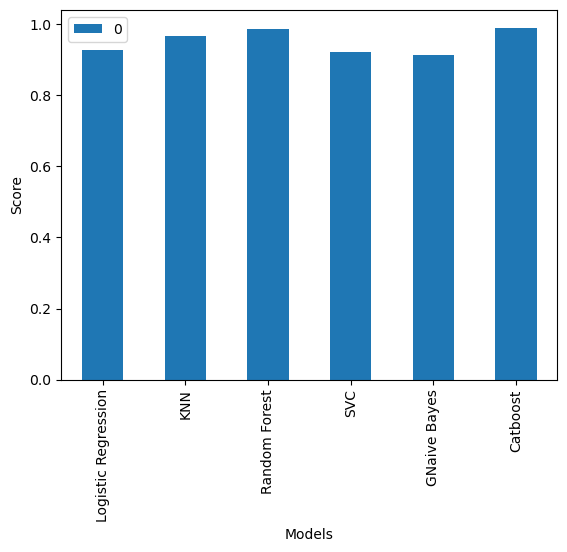

In [186]:
scores_df.T.plot.bar()
plt.xlabel('Models')
plt.ylabel('Score');

In [187]:
df.columns

Index(['generation', 'status', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'growth_rate'],
      dtype='object')

C:\Users\Zardian\AppData\Local\Temp\ipykernel_12836\3658550150.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


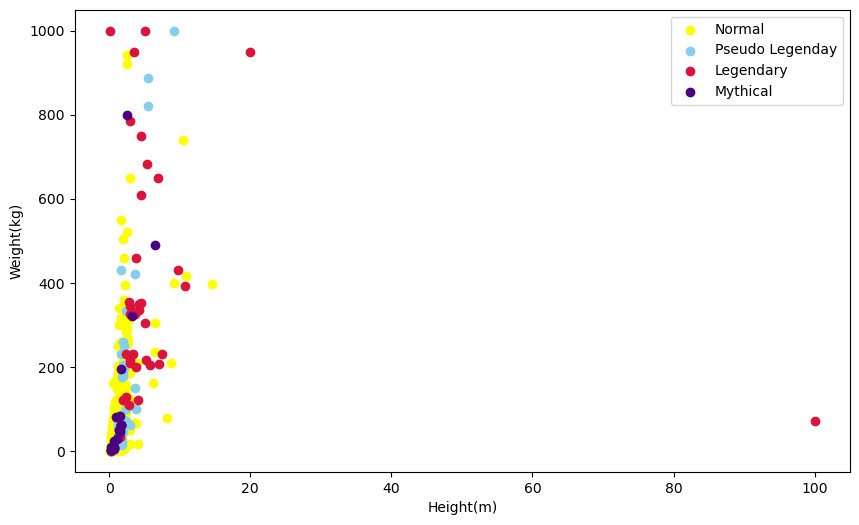

In [210]:
fig, ax= plt.subplots(figsize=(10,6))
ax.scatter(df['height_m'][df['status']==0], df['weight_kg'][df['status']==0], c='yellow')
ax.scatter(df['height_m'][df['status']==1], df['weight_kg'][df['status']==1], c='skyblue')
ax.scatter(df['height_m'][df['status']==2], df['weight_kg'][df['status']==2], c='crimson')
ax.scatter(df['height_m'][df['status']==3], df['weight_kg'][df['status']==3], c='indigo')
ax.set(xlabel='Height(m)', ylabel='Weight(kg)');
ax.legend(['Normal', 'Pseudo Legenday', 'Legendary', 'Mythical']);
fig.show();

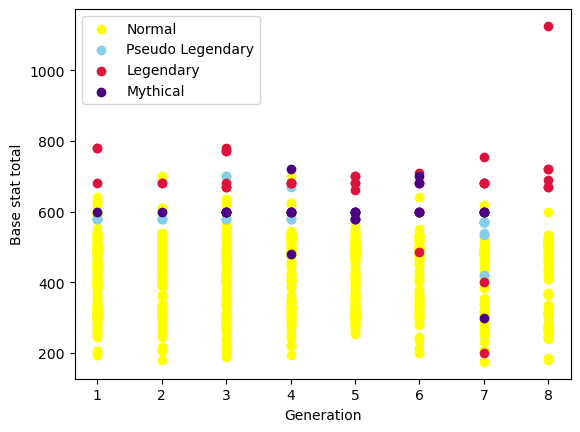

In [220]:
fig, ax = plt.subplots()
ax.scatter(df['generation'][df['status']==0], df['total_points'][df['status']==0], c='yellow');
ax.scatter(df['generation'][df['status']==1], df['total_points'][df['status']==1], c='skyblue');
ax.scatter(df['generation'][df['status']==2], df['total_points'][df['status']==2], c='crimson');
ax.scatter(df['generation'][df['status']==3], df['total_points'][df['status']==3], c='indigo');
ax.set(xlabel='Generation', ylabel='Base stat total')
ax.legend(['Normal', 'Pseudo Legendary', 'Legendary', 'Mythical']);

In [189]:
from sklearn.model_selection import cross_val_score

### Applying cross validation

In [190]:
def fit_and_train_cv(models,X,y):
    """
    Input the model and it will train it.
    models: a dictionary of models
    """
    np.random.seed(42)
    model_scores={}
    
    for name, model in models.items():
        print('Training on ', name,"...")
        print("Testing model...")
        model_scores[name]=np.mean(cross_val_score(model, X, y, cv=5))
        print("-------------------------------------")
    
    return model_scores

In [191]:
cv_scores= fit_and_train_cv(models, X, y)
cv_scores

Training on  Logistic Regression ...
Testing model...


D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

-------------------------------------
Training on  KNN ...
Testing model...
-------------------------------------
Training on  Random Forest ...
Testing model...
-------------------------------------
Training on  SVC ...
Testing model...
-------------------------------------
Training on  GNaive Bayes ...
Testing model...
-------------------------------------
Training on  Catboost ...
Testing model...
Learning rate set to 0.07834
0:	learn: 1.2126062	total: 15.3ms	remaining: 15.3s
1:	learn: 1.0843950	total: 33.5ms	remaining: 16.7s
2:	learn: 0.9786894	total: 46.2ms	remaining: 15.4s
3:	learn: 0.8825370	total: 50.9ms	remaining: 12.7s
4:	learn: 0.8151617	total: 56.9ms	remaining: 11.3s
5:	learn: 0.7475070	total: 63.5ms	remaining: 10.5s
6:	learn: 0.6889028	total: 68.7ms	remaining: 9.75s
7:	learn: 0.6389229	total: 72.8ms	remaining: 9.02s
8:	learn: 0.5924998	total: 76.6ms	remaining: 8.43s
9:	learn: 0.5530265	total: 82.2ms	remaining: 8.14s
10:	learn: 0.5172734	total: 85.9ms	remaining: 7.72s
11:	l

178:	learn: 0.0409097	total: 783ms	remaining: 3.59s
179:	learn: 0.0406377	total: 788ms	remaining: 3.59s
180:	learn: 0.0403696	total: 791ms	remaining: 3.58s
181:	learn: 0.0403310	total: 796ms	remaining: 3.58s
182:	learn: 0.0399875	total: 800ms	remaining: 3.57s
183:	learn: 0.0397019	total: 803ms	remaining: 3.56s
184:	learn: 0.0396309	total: 807ms	remaining: 3.56s
185:	learn: 0.0394011	total: 811ms	remaining: 3.55s
186:	learn: 0.0392004	total: 816ms	remaining: 3.55s
187:	learn: 0.0390024	total: 819ms	remaining: 3.54s
188:	learn: 0.0387842	total: 823ms	remaining: 3.53s
189:	learn: 0.0384825	total: 827ms	remaining: 3.53s
190:	learn: 0.0381646	total: 831ms	remaining: 3.52s
191:	learn: 0.0380734	total: 835ms	remaining: 3.51s
192:	learn: 0.0378403	total: 838ms	remaining: 3.5s
193:	learn: 0.0376500	total: 842ms	remaining: 3.5s
194:	learn: 0.0374413	total: 846ms	remaining: 3.49s
195:	learn: 0.0371238	total: 849ms	remaining: 3.48s
196:	learn: 0.0368746	total: 853ms	remaining: 3.48s
197:	learn: 0.

339:	learn: 0.0188682	total: 1.4s	remaining: 2.71s
340:	learn: 0.0188188	total: 1.4s	remaining: 2.7s
341:	learn: 0.0187856	total: 1.4s	remaining: 2.7s
342:	learn: 0.0187036	total: 1.41s	remaining: 2.69s
343:	learn: 0.0186626	total: 1.41s	remaining: 2.69s
344:	learn: 0.0185651	total: 1.41s	remaining: 2.68s
345:	learn: 0.0185105	total: 1.42s	remaining: 2.68s
346:	learn: 0.0184498	total: 1.42s	remaining: 2.67s
347:	learn: 0.0183769	total: 1.42s	remaining: 2.67s
348:	learn: 0.0182964	total: 1.43s	remaining: 2.66s
349:	learn: 0.0182437	total: 1.43s	remaining: 2.65s
350:	learn: 0.0182147	total: 1.43s	remaining: 2.65s
351:	learn: 0.0181538	total: 1.44s	remaining: 2.64s
352:	learn: 0.0180728	total: 1.44s	remaining: 2.64s
353:	learn: 0.0179859	total: 1.44s	remaining: 2.63s
354:	learn: 0.0179170	total: 1.45s	remaining: 2.63s
355:	learn: 0.0177896	total: 1.45s	remaining: 2.62s
356:	learn: 0.0177306	total: 1.45s	remaining: 2.61s
357:	learn: 0.0176639	total: 1.45s	remaining: 2.61s
358:	learn: 0.017

510:	learn: 0.0110726	total: 1.99s	remaining: 1.91s
511:	learn: 0.0110387	total: 2s	remaining: 1.9s
512:	learn: 0.0110189	total: 2s	remaining: 1.9s
513:	learn: 0.0110035	total: 2.01s	remaining: 1.9s
514:	learn: 0.0109937	total: 2.01s	remaining: 1.89s
515:	learn: 0.0109509	total: 2.02s	remaining: 1.89s
516:	learn: 0.0109254	total: 2.02s	remaining: 1.89s
517:	learn: 0.0108868	total: 2.03s	remaining: 1.89s
518:	learn: 0.0108521	total: 2.03s	remaining: 1.88s
519:	learn: 0.0108262	total: 2.03s	remaining: 1.88s
520:	learn: 0.0107962	total: 2.04s	remaining: 1.88s
521:	learn: 0.0107732	total: 2.04s	remaining: 1.87s
522:	learn: 0.0107381	total: 2.05s	remaining: 1.87s
523:	learn: 0.0106819	total: 2.05s	remaining: 1.86s
524:	learn: 0.0106609	total: 2.06s	remaining: 1.86s
525:	learn: 0.0106447	total: 2.06s	remaining: 1.86s
526:	learn: 0.0106267	total: 2.06s	remaining: 1.85s
527:	learn: 0.0105928	total: 2.07s	remaining: 1.85s
528:	learn: 0.0105600	total: 2.07s	remaining: 1.84s
529:	learn: 0.0105406

672:	learn: 0.0079043	total: 2.59s	remaining: 1.26s
673:	learn: 0.0078910	total: 2.59s	remaining: 1.25s
674:	learn: 0.0078764	total: 2.6s	remaining: 1.25s
675:	learn: 0.0078620	total: 2.6s	remaining: 1.25s
676:	learn: 0.0078463	total: 2.6s	remaining: 1.24s
677:	learn: 0.0078330	total: 2.61s	remaining: 1.24s
678:	learn: 0.0078176	total: 2.61s	remaining: 1.24s
679:	learn: 0.0078027	total: 2.62s	remaining: 1.23s
680:	learn: 0.0077844	total: 2.62s	remaining: 1.23s
681:	learn: 0.0077779	total: 2.62s	remaining: 1.22s
682:	learn: 0.0077613	total: 2.63s	remaining: 1.22s
683:	learn: 0.0077517	total: 2.63s	remaining: 1.22s
684:	learn: 0.0077449	total: 2.63s	remaining: 1.21s
685:	learn: 0.0077236	total: 2.64s	remaining: 1.21s
686:	learn: 0.0077118	total: 2.64s	remaining: 1.2s
687:	learn: 0.0076939	total: 2.65s	remaining: 1.2s
688:	learn: 0.0076822	total: 2.65s	remaining: 1.2s
689:	learn: 0.0076748	total: 2.65s	remaining: 1.19s
690:	learn: 0.0076548	total: 2.66s	remaining: 1.19s
691:	learn: 0.0076

849:	learn: 0.0058909	total: 3.19s	remaining: 563ms
850:	learn: 0.0058782	total: 3.19s	remaining: 559ms
851:	learn: 0.0058665	total: 3.19s	remaining: 555ms
852:	learn: 0.0058654	total: 3.2s	remaining: 551ms
853:	learn: 0.0058570	total: 3.2s	remaining: 547ms
854:	learn: 0.0058551	total: 3.21s	remaining: 544ms
855:	learn: 0.0058467	total: 3.21s	remaining: 540ms
856:	learn: 0.0058412	total: 3.21s	remaining: 536ms
857:	learn: 0.0058357	total: 3.21s	remaining: 532ms
858:	learn: 0.0058269	total: 3.22s	remaining: 528ms
859:	learn: 0.0058184	total: 3.22s	remaining: 524ms
860:	learn: 0.0058104	total: 3.22s	remaining: 521ms
861:	learn: 0.0058038	total: 3.23s	remaining: 517ms
862:	learn: 0.0057977	total: 3.23s	remaining: 513ms
863:	learn: 0.0057948	total: 3.23s	remaining: 509ms
864:	learn: 0.0057838	total: 3.24s	remaining: 505ms
865:	learn: 0.0057799	total: 3.24s	remaining: 501ms
866:	learn: 0.0057732	total: 3.24s	remaining: 498ms
867:	learn: 0.0057718	total: 3.25s	remaining: 494ms
868:	learn: 0.

16:	learn: 0.3686369	total: 209ms	remaining: 12.1s
17:	learn: 0.3460607	total: 217ms	remaining: 11.9s
18:	learn: 0.3310973	total: 224ms	remaining: 11.6s
19:	learn: 0.3176174	total: 230ms	remaining: 11.3s
20:	learn: 0.3017243	total: 236ms	remaining: 11s
21:	learn: 0.2883334	total: 241ms	remaining: 10.7s
22:	learn: 0.2725405	total: 245ms	remaining: 10.4s
23:	learn: 0.2618304	total: 249ms	remaining: 10.1s
24:	learn: 0.2501994	total: 253ms	remaining: 9.88s
25:	learn: 0.2381989	total: 257ms	remaining: 9.65s
26:	learn: 0.2268559	total: 262ms	remaining: 9.43s
27:	learn: 0.2183513	total: 266ms	remaining: 9.23s
28:	learn: 0.2090175	total: 270ms	remaining: 9.05s
29:	learn: 0.1999589	total: 274ms	remaining: 8.86s
30:	learn: 0.1932100	total: 278ms	remaining: 8.69s
31:	learn: 0.1865222	total: 282ms	remaining: 8.53s
32:	learn: 0.1813807	total: 286ms	remaining: 8.37s
33:	learn: 0.1751686	total: 289ms	remaining: 8.22s
34:	learn: 0.1695695	total: 293ms	remaining: 8.08s
35:	learn: 0.1636638	total: 297ms

224:	learn: 0.0276683	total: 994ms	remaining: 3.42s
225:	learn: 0.0274747	total: 997ms	remaining: 3.42s
226:	learn: 0.0272576	total: 1s	remaining: 3.41s
227:	learn: 0.0271264	total: 1s	remaining: 3.4s
228:	learn: 0.0270075	total: 1.01s	remaining: 3.4s
229:	learn: 0.0269808	total: 1.01s	remaining: 3.39s
230:	learn: 0.0269495	total: 1.02s	remaining: 3.39s
231:	learn: 0.0267912	total: 1.02s	remaining: 3.38s
232:	learn: 0.0266313	total: 1.02s	remaining: 3.37s
233:	learn: 0.0264716	total: 1.03s	remaining: 3.37s
234:	learn: 0.0262944	total: 1.03s	remaining: 3.36s
235:	learn: 0.0262507	total: 1.04s	remaining: 3.35s
236:	learn: 0.0262213	total: 1.04s	remaining: 3.35s
237:	learn: 0.0260833	total: 1.04s	remaining: 3.34s
238:	learn: 0.0258909	total: 1.05s	remaining: 3.33s
239:	learn: 0.0258086	total: 1.05s	remaining: 3.33s
240:	learn: 0.0257604	total: 1.05s	remaining: 3.32s
241:	learn: 0.0256317	total: 1.06s	remaining: 3.31s
242:	learn: 0.0255609	total: 1.06s	remaining: 3.3s
243:	learn: 0.0254374

417:	learn: 0.0129048	total: 1.75s	remaining: 2.43s
418:	learn: 0.0128261	total: 1.75s	remaining: 2.43s
419:	learn: 0.0127778	total: 1.75s	remaining: 2.42s
420:	learn: 0.0127628	total: 1.76s	remaining: 2.42s
421:	learn: 0.0127321	total: 1.76s	remaining: 2.41s
422:	learn: 0.0126742	total: 1.76s	remaining: 2.41s
423:	learn: 0.0126536	total: 1.77s	remaining: 2.4s
424:	learn: 0.0125987	total: 1.77s	remaining: 2.4s
425:	learn: 0.0125684	total: 1.78s	remaining: 2.39s
426:	learn: 0.0125531	total: 1.78s	remaining: 2.39s
427:	learn: 0.0125334	total: 1.78s	remaining: 2.38s
428:	learn: 0.0125123	total: 1.79s	remaining: 2.38s
429:	learn: 0.0124734	total: 1.79s	remaining: 2.38s
430:	learn: 0.0124241	total: 1.8s	remaining: 2.37s
431:	learn: 0.0123906	total: 1.8s	remaining: 2.37s
432:	learn: 0.0123159	total: 1.8s	remaining: 2.36s
433:	learn: 0.0122481	total: 1.81s	remaining: 2.36s
434:	learn: 0.0122173	total: 1.81s	remaining: 2.35s
435:	learn: 0.0122057	total: 1.82s	remaining: 2.35s
436:	learn: 0.012

576:	learn: 0.0085341	total: 2.33s	remaining: 1.71s
577:	learn: 0.0085203	total: 2.33s	remaining: 1.7s
578:	learn: 0.0084978	total: 2.34s	remaining: 1.7s
579:	learn: 0.0084620	total: 2.34s	remaining: 1.7s
580:	learn: 0.0084513	total: 2.34s	remaining: 1.69s
581:	learn: 0.0084336	total: 2.35s	remaining: 1.69s
582:	learn: 0.0084310	total: 2.35s	remaining: 1.68s
583:	learn: 0.0084128	total: 2.36s	remaining: 1.68s
584:	learn: 0.0084005	total: 2.36s	remaining: 1.67s
585:	learn: 0.0083750	total: 2.36s	remaining: 1.67s
586:	learn: 0.0083629	total: 2.37s	remaining: 1.67s
587:	learn: 0.0083346	total: 2.37s	remaining: 1.66s
588:	learn: 0.0083162	total: 2.38s	remaining: 1.66s
589:	learn: 0.0082912	total: 2.38s	remaining: 1.65s
590:	learn: 0.0082747	total: 2.38s	remaining: 1.65s
591:	learn: 0.0082688	total: 2.39s	remaining: 1.64s
592:	learn: 0.0082451	total: 2.39s	remaining: 1.64s
593:	learn: 0.0082161	total: 2.39s	remaining: 1.64s
594:	learn: 0.0081940	total: 2.4s	remaining: 1.63s
595:	learn: 0.00

776:	learn: 0.0057957	total: 3.15s	remaining: 905ms
777:	learn: 0.0057823	total: 3.17s	remaining: 904ms
778:	learn: 0.0057703	total: 3.17s	remaining: 900ms
779:	learn: 0.0057634	total: 3.17s	remaining: 896ms
780:	learn: 0.0057579	total: 3.18s	remaining: 891ms
781:	learn: 0.0057495	total: 3.18s	remaining: 887ms
782:	learn: 0.0057451	total: 3.19s	remaining: 884ms
783:	learn: 0.0057432	total: 3.2s	remaining: 882ms
784:	learn: 0.0057352	total: 3.2s	remaining: 878ms
785:	learn: 0.0057269	total: 3.21s	remaining: 874ms
786:	learn: 0.0057144	total: 3.21s	remaining: 870ms
787:	learn: 0.0057079	total: 3.22s	remaining: 866ms
788:	learn: 0.0056999	total: 3.22s	remaining: 862ms
789:	learn: 0.0056968	total: 3.23s	remaining: 858ms
790:	learn: 0.0056872	total: 3.23s	remaining: 854ms
791:	learn: 0.0056831	total: 3.23s	remaining: 850ms
792:	learn: 0.0056772	total: 3.24s	remaining: 846ms
793:	learn: 0.0056702	total: 3.24s	remaining: 842ms
794:	learn: 0.0056632	total: 3.25s	remaining: 838ms
795:	learn: 0.

967:	learn: 0.0043658	total: 3.94s	remaining: 130ms
968:	learn: 0.0043600	total: 3.95s	remaining: 126ms
969:	learn: 0.0043573	total: 3.95s	remaining: 122ms
970:	learn: 0.0043508	total: 3.95s	remaining: 118ms
971:	learn: 0.0043493	total: 3.96s	remaining: 114ms
972:	learn: 0.0043427	total: 3.96s	remaining: 110ms
973:	learn: 0.0043395	total: 3.96s	remaining: 106ms
974:	learn: 0.0043347	total: 3.97s	remaining: 102ms
975:	learn: 0.0043301	total: 3.97s	remaining: 97.7ms
976:	learn: 0.0043198	total: 3.98s	remaining: 93.6ms
977:	learn: 0.0043113	total: 3.98s	remaining: 89.5ms
978:	learn: 0.0043027	total: 3.98s	remaining: 85.4ms
979:	learn: 0.0043009	total: 3.99s	remaining: 81.3ms
980:	learn: 0.0042924	total: 3.99s	remaining: 77.3ms
981:	learn: 0.0042902	total: 3.99s	remaining: 73.2ms
982:	learn: 0.0042838	total: 4s	remaining: 69.1ms
983:	learn: 0.0042776	total: 4s	remaining: 65ms
984:	learn: 0.0042696	total: 4s	remaining: 61ms
985:	learn: 0.0042639	total: 4s	remaining: 56.9ms
986:	learn: 0.004

146:	learn: 0.0442088	total: 794ms	remaining: 4.61s
147:	learn: 0.0439198	total: 798ms	remaining: 4.59s
148:	learn: 0.0435860	total: 802ms	remaining: 4.58s
149:	learn: 0.0431464	total: 806ms	remaining: 4.57s
150:	learn: 0.0429266	total: 810ms	remaining: 4.55s
151:	learn: 0.0428422	total: 815ms	remaining: 4.54s
152:	learn: 0.0425427	total: 820ms	remaining: 4.54s
153:	learn: 0.0420391	total: 825ms	remaining: 4.53s
154:	learn: 0.0416678	total: 829ms	remaining: 4.52s
155:	learn: 0.0415384	total: 834ms	remaining: 4.51s
156:	learn: 0.0412322	total: 838ms	remaining: 4.5s
157:	learn: 0.0411166	total: 842ms	remaining: 4.49s
158:	learn: 0.0408084	total: 846ms	remaining: 4.47s
159:	learn: 0.0404428	total: 850ms	remaining: 4.46s
160:	learn: 0.0399958	total: 855ms	remaining: 4.45s
161:	learn: 0.0398562	total: 859ms	remaining: 4.44s
162:	learn: 0.0395176	total: 863ms	remaining: 4.43s
163:	learn: 0.0391015	total: 867ms	remaining: 4.42s
164:	learn: 0.0390492	total: 871ms	remaining: 4.41s
165:	learn: 0

355:	learn: 0.0152417	total: 1.6s	remaining: 2.89s
356:	learn: 0.0152121	total: 1.6s	remaining: 2.89s
357:	learn: 0.0151502	total: 1.61s	remaining: 2.88s
358:	learn: 0.0151259	total: 1.61s	remaining: 2.88s
359:	learn: 0.0150551	total: 1.61s	remaining: 2.87s
360:	learn: 0.0150018	total: 1.62s	remaining: 2.86s
361:	learn: 0.0149414	total: 1.62s	remaining: 2.86s
362:	learn: 0.0149164	total: 1.63s	remaining: 2.85s
363:	learn: 0.0148819	total: 1.63s	remaining: 2.85s
364:	learn: 0.0148115	total: 1.64s	remaining: 2.86s
365:	learn: 0.0147309	total: 1.66s	remaining: 2.87s
366:	learn: 0.0146649	total: 1.67s	remaining: 2.88s
367:	learn: 0.0145578	total: 1.68s	remaining: 2.89s
368:	learn: 0.0145150	total: 1.7s	remaining: 2.9s
369:	learn: 0.0144522	total: 1.71s	remaining: 2.91s
370:	learn: 0.0144287	total: 1.72s	remaining: 2.91s
371:	learn: 0.0143806	total: 1.72s	remaining: 2.9s
372:	learn: 0.0143061	total: 1.73s	remaining: 2.9s
373:	learn: 0.0142356	total: 1.73s	remaining: 2.9s
374:	learn: 0.01418

537:	learn: 0.0089667	total: 2.38s	remaining: 2.04s
538:	learn: 0.0089516	total: 2.38s	remaining: 2.03s
539:	learn: 0.0089319	total: 2.38s	remaining: 2.03s
540:	learn: 0.0088969	total: 2.38s	remaining: 2.02s
541:	learn: 0.0088827	total: 2.39s	remaining: 2.02s
542:	learn: 0.0088535	total: 2.39s	remaining: 2.01s
543:	learn: 0.0088340	total: 2.4s	remaining: 2.01s
544:	learn: 0.0088164	total: 2.4s	remaining: 2s
545:	learn: 0.0087904	total: 2.4s	remaining: 2s
546:	learn: 0.0087678	total: 2.41s	remaining: 1.99s
547:	learn: 0.0087373	total: 2.41s	remaining: 1.99s
548:	learn: 0.0087215	total: 2.41s	remaining: 1.98s
549:	learn: 0.0086919	total: 2.42s	remaining: 1.98s
550:	learn: 0.0086707	total: 2.42s	remaining: 1.97s
551:	learn: 0.0086522	total: 2.42s	remaining: 1.97s
552:	learn: 0.0086338	total: 2.42s	remaining: 1.96s
553:	learn: 0.0086137	total: 2.43s	remaining: 1.96s
554:	learn: 0.0085947	total: 2.43s	remaining: 1.95s
555:	learn: 0.0085706	total: 2.44s	remaining: 1.94s
556:	learn: 0.0085477

712:	learn: 0.0062515	total: 2.97s	remaining: 1.2s
713:	learn: 0.0062427	total: 2.97s	remaining: 1.19s
714:	learn: 0.0062354	total: 2.98s	remaining: 1.19s
715:	learn: 0.0062188	total: 2.98s	remaining: 1.18s
716:	learn: 0.0062086	total: 2.98s	remaining: 1.18s
717:	learn: 0.0061886	total: 2.99s	remaining: 1.17s
718:	learn: 0.0061758	total: 2.99s	remaining: 1.17s
719:	learn: 0.0061651	total: 3s	remaining: 1.16s
720:	learn: 0.0061515	total: 3s	remaining: 1.16s
721:	learn: 0.0061471	total: 3s	remaining: 1.16s
722:	learn: 0.0061296	total: 3s	remaining: 1.15s
723:	learn: 0.0061223	total: 3.01s	remaining: 1.15s
724:	learn: 0.0061115	total: 3.01s	remaining: 1.14s
725:	learn: 0.0060978	total: 3.01s	remaining: 1.14s
726:	learn: 0.0060912	total: 3.02s	remaining: 1.13s
727:	learn: 0.0060760	total: 3.02s	remaining: 1.13s
728:	learn: 0.0060585	total: 3.02s	remaining: 1.12s
729:	learn: 0.0060488	total: 3.03s	remaining: 1.12s
730:	learn: 0.0060442	total: 3.03s	remaining: 1.11s
731:	learn: 0.0060353	tot

872:	learn: 0.0048362	total: 3.56s	remaining: 518ms
873:	learn: 0.0048315	total: 3.56s	remaining: 513ms
874:	learn: 0.0048175	total: 3.56s	remaining: 509ms
875:	learn: 0.0048097	total: 3.57s	remaining: 505ms
876:	learn: 0.0048053	total: 3.57s	remaining: 501ms
877:	learn: 0.0047978	total: 3.58s	remaining: 497ms
878:	learn: 0.0047907	total: 3.58s	remaining: 493ms
879:	learn: 0.0047800	total: 3.58s	remaining: 489ms
880:	learn: 0.0047712	total: 3.59s	remaining: 485ms
881:	learn: 0.0047664	total: 3.59s	remaining: 481ms
882:	learn: 0.0047609	total: 3.6s	remaining: 476ms
883:	learn: 0.0047515	total: 3.6s	remaining: 472ms
884:	learn: 0.0047450	total: 3.6s	remaining: 468ms
885:	learn: 0.0047399	total: 3.61s	remaining: 464ms
886:	learn: 0.0047350	total: 3.61s	remaining: 460ms
887:	learn: 0.0047240	total: 3.61s	remaining: 456ms
888:	learn: 0.0047192	total: 3.62s	remaining: 451ms
889:	learn: 0.0047140	total: 3.62s	remaining: 447ms
890:	learn: 0.0047078	total: 3.62s	remaining: 443ms
891:	learn: 0.0

36:	learn: 0.1629198	total: 410ms	remaining: 10.7s
37:	learn: 0.1579449	total: 414ms	remaining: 10.5s
38:	learn: 0.1536353	total: 417ms	remaining: 10.3s
39:	learn: 0.1501685	total: 421ms	remaining: 10.1s
40:	learn: 0.1461766	total: 425ms	remaining: 9.94s
41:	learn: 0.1415775	total: 429ms	remaining: 9.78s
42:	learn: 0.1386171	total: 433ms	remaining: 9.63s
43:	learn: 0.1343837	total: 436ms	remaining: 9.48s
44:	learn: 0.1310210	total: 440ms	remaining: 9.33s
45:	learn: 0.1279159	total: 443ms	remaining: 9.19s
46:	learn: 0.1254726	total: 447ms	remaining: 9.07s
47:	learn: 0.1228169	total: 451ms	remaining: 8.94s
48:	learn: 0.1203521	total: 454ms	remaining: 8.82s
49:	learn: 0.1182601	total: 458ms	remaining: 8.7s
50:	learn: 0.1166004	total: 461ms	remaining: 8.58s
51:	learn: 0.1141157	total: 465ms	remaining: 8.47s
52:	learn: 0.1123720	total: 468ms	remaining: 8.36s
53:	learn: 0.1102787	total: 472ms	remaining: 8.26s
54:	learn: 0.1076523	total: 475ms	remaining: 8.16s
55:	learn: 0.1054220	total: 479m

206:	learn: 0.0286275	total: 991ms	remaining: 3.8s
207:	learn: 0.0283135	total: 995ms	remaining: 3.79s
208:	learn: 0.0281315	total: 998ms	remaining: 3.78s
209:	learn: 0.0278591	total: 1s	remaining: 3.77s
210:	learn: 0.0276669	total: 1s	remaining: 3.76s
211:	learn: 0.0274903	total: 1.01s	remaining: 3.75s
212:	learn: 0.0272655	total: 1.01s	remaining: 3.74s
213:	learn: 0.0270939	total: 1.02s	remaining: 3.73s
214:	learn: 0.0269933	total: 1.02s	remaining: 3.72s
215:	learn: 0.0267617	total: 1.02s	remaining: 3.71s
216:	learn: 0.0266287	total: 1.03s	remaining: 3.7s
217:	learn: 0.0264390	total: 1.03s	remaining: 3.69s
218:	learn: 0.0263547	total: 1.03s	remaining: 3.68s
219:	learn: 0.0261879	total: 1.04s	remaining: 3.67s
220:	learn: 0.0260167	total: 1.04s	remaining: 3.66s
221:	learn: 0.0258081	total: 1.04s	remaining: 3.65s
222:	learn: 0.0256589	total: 1.04s	remaining: 3.64s
223:	learn: 0.0255202	total: 1.05s	remaining: 3.63s
224:	learn: 0.0254904	total: 1.05s	remaining: 3.62s
225:	learn: 0.025395

394:	learn: 0.0125896	total: 1.59s	remaining: 2.44s
395:	learn: 0.0125400	total: 1.59s	remaining: 2.43s
396:	learn: 0.0124743	total: 1.6s	remaining: 2.42s
397:	learn: 0.0124366	total: 1.6s	remaining: 2.42s
398:	learn: 0.0123933	total: 1.6s	remaining: 2.42s
399:	learn: 0.0123809	total: 1.61s	remaining: 2.41s
400:	learn: 0.0123309	total: 1.61s	remaining: 2.41s
401:	learn: 0.0123103	total: 1.61s	remaining: 2.4s
402:	learn: 0.0122773	total: 1.62s	remaining: 2.4s
403:	learn: 0.0122502	total: 1.62s	remaining: 2.39s
404:	learn: 0.0122140	total: 1.63s	remaining: 2.39s
405:	learn: 0.0121737	total: 1.63s	remaining: 2.38s
406:	learn: 0.0121417	total: 1.63s	remaining: 2.38s
407:	learn: 0.0121024	total: 1.64s	remaining: 2.37s
408:	learn: 0.0120584	total: 1.64s	remaining: 2.37s
409:	learn: 0.0120061	total: 1.64s	remaining: 2.36s
410:	learn: 0.0119858	total: 1.65s	remaining: 2.36s
411:	learn: 0.0119418	total: 1.65s	remaining: 2.35s
412:	learn: 0.0119103	total: 1.65s	remaining: 2.35s
413:	learn: 0.011

564:	learn: 0.0080047	total: 2.17s	remaining: 1.67s
565:	learn: 0.0079859	total: 2.17s	remaining: 1.67s
566:	learn: 0.0079746	total: 2.18s	remaining: 1.66s
567:	learn: 0.0079498	total: 2.18s	remaining: 1.66s
568:	learn: 0.0079234	total: 2.19s	remaining: 1.66s
569:	learn: 0.0078996	total: 2.19s	remaining: 1.65s
570:	learn: 0.0078773	total: 2.19s	remaining: 1.65s
571:	learn: 0.0078568	total: 2.2s	remaining: 1.64s
572:	learn: 0.0078463	total: 2.2s	remaining: 1.64s
573:	learn: 0.0078208	total: 2.2s	remaining: 1.64s
574:	learn: 0.0078006	total: 2.21s	remaining: 1.63s
575:	learn: 0.0077883	total: 2.21s	remaining: 1.63s
576:	learn: 0.0077708	total: 2.21s	remaining: 1.62s
577:	learn: 0.0077584	total: 2.22s	remaining: 1.62s
578:	learn: 0.0077358	total: 2.22s	remaining: 1.61s
579:	learn: 0.0077318	total: 2.23s	remaining: 1.61s
580:	learn: 0.0077135	total: 2.23s	remaining: 1.61s
581:	learn: 0.0076935	total: 2.23s	remaining: 1.6s
582:	learn: 0.0076822	total: 2.23s	remaining: 1.6s
583:	learn: 0.007

731:	learn: 0.0057628	total: 2.75s	remaining: 1.01s
732:	learn: 0.0057539	total: 2.76s	remaining: 1s
733:	learn: 0.0057449	total: 2.76s	remaining: 1s
734:	learn: 0.0057332	total: 2.77s	remaining: 998ms
735:	learn: 0.0057261	total: 2.77s	remaining: 994ms
736:	learn: 0.0057080	total: 2.77s	remaining: 990ms
737:	learn: 0.0056967	total: 2.78s	remaining: 986ms
738:	learn: 0.0056840	total: 2.78s	remaining: 982ms
739:	learn: 0.0056752	total: 2.79s	remaining: 979ms
740:	learn: 0.0056663	total: 2.79s	remaining: 975ms
741:	learn: 0.0056598	total: 2.79s	remaining: 971ms
742:	learn: 0.0056468	total: 2.8s	remaining: 967ms
743:	learn: 0.0056366	total: 2.8s	remaining: 963ms
744:	learn: 0.0056240	total: 2.8s	remaining: 960ms
745:	learn: 0.0056184	total: 2.81s	remaining: 956ms
746:	learn: 0.0056053	total: 2.81s	remaining: 952ms
747:	learn: 0.0055910	total: 2.81s	remaining: 948ms
748:	learn: 0.0055806	total: 2.82s	remaining: 944ms
749:	learn: 0.0055724	total: 2.82s	remaining: 940ms
750:	learn: 0.0055628

914:	learn: 0.0043683	total: 3.35s	remaining: 311ms
915:	learn: 0.0043604	total: 3.35s	remaining: 308ms
916:	learn: 0.0043515	total: 3.36s	remaining: 304ms
917:	learn: 0.0043426	total: 3.36s	remaining: 300ms
918:	learn: 0.0043371	total: 3.37s	remaining: 297ms
919:	learn: 0.0043314	total: 3.37s	remaining: 293ms
920:	learn: 0.0043261	total: 3.37s	remaining: 289ms
921:	learn: 0.0043195	total: 3.38s	remaining: 286ms
922:	learn: 0.0043151	total: 3.38s	remaining: 282ms
923:	learn: 0.0043089	total: 3.39s	remaining: 279ms
924:	learn: 0.0042992	total: 3.39s	remaining: 275ms
925:	learn: 0.0042952	total: 3.4s	remaining: 272ms
926:	learn: 0.0042875	total: 3.4s	remaining: 268ms
927:	learn: 0.0042840	total: 3.41s	remaining: 264ms
928:	learn: 0.0042799	total: 3.41s	remaining: 261ms
929:	learn: 0.0042694	total: 3.42s	remaining: 257ms
930:	learn: 0.0042660	total: 3.42s	remaining: 254ms
931:	learn: 0.0042645	total: 3.43s	remaining: 250ms
932:	learn: 0.0042585	total: 3.43s	remaining: 246ms
933:	learn: 0.

95:	learn: 0.0516459	total: 382ms	remaining: 3.59s
96:	learn: 0.0509584	total: 385ms	remaining: 3.59s
97:	learn: 0.0502316	total: 389ms	remaining: 3.58s
98:	learn: 0.0497732	total: 392ms	remaining: 3.57s
99:	learn: 0.0491091	total: 396ms	remaining: 3.56s
100:	learn: 0.0486160	total: 400ms	remaining: 3.56s
101:	learn: 0.0481676	total: 403ms	remaining: 3.55s
102:	learn: 0.0477813	total: 407ms	remaining: 3.54s
103:	learn: 0.0472050	total: 410ms	remaining: 3.53s
104:	learn: 0.0466665	total: 413ms	remaining: 3.52s
105:	learn: 0.0460803	total: 417ms	remaining: 3.52s
106:	learn: 0.0455875	total: 420ms	remaining: 3.51s
107:	learn: 0.0450684	total: 424ms	remaining: 3.5s
108:	learn: 0.0447638	total: 427ms	remaining: 3.49s
109:	learn: 0.0444702	total: 430ms	remaining: 3.48s
110:	learn: 0.0441245	total: 433ms	remaining: 3.47s
111:	learn: 0.0437089	total: 437ms	remaining: 3.46s
112:	learn: 0.0435405	total: 438ms	remaining: 3.44s
113:	learn: 0.0430019	total: 441ms	remaining: 3.43s
114:	learn: 0.0427

271:	learn: 0.0157327	total: 969ms	remaining: 2.59s
272:	learn: 0.0156840	total: 973ms	remaining: 2.59s
273:	learn: 0.0156115	total: 976ms	remaining: 2.58s
274:	learn: 0.0155788	total: 979ms	remaining: 2.58s
275:	learn: 0.0154535	total: 983ms	remaining: 2.58s
276:	learn: 0.0153774	total: 986ms	remaining: 2.57s
277:	learn: 0.0153461	total: 989ms	remaining: 2.57s
278:	learn: 0.0152345	total: 993ms	remaining: 2.56s
279:	learn: 0.0151847	total: 996ms	remaining: 2.56s
280:	learn: 0.0151134	total: 999ms	remaining: 2.56s
281:	learn: 0.0150426	total: 1s	remaining: 2.55s
282:	learn: 0.0149686	total: 1s	remaining: 2.55s
283:	learn: 0.0149080	total: 1.01s	remaining: 2.54s
284:	learn: 0.0147741	total: 1.01s	remaining: 2.54s
285:	learn: 0.0147138	total: 1.01s	remaining: 2.54s
286:	learn: 0.0146389	total: 1.02s	remaining: 2.53s
287:	learn: 0.0145804	total: 1.02s	remaining: 2.53s
288:	learn: 0.0145082	total: 1.02s	remaining: 2.52s
289:	learn: 0.0143835	total: 1.03s	remaining: 2.52s
290:	learn: 0.0143

452:	learn: 0.0077516	total: 1.57s	remaining: 1.89s
453:	learn: 0.0077242	total: 1.57s	remaining: 1.89s
454:	learn: 0.0077035	total: 1.57s	remaining: 1.89s
455:	learn: 0.0076741	total: 1.58s	remaining: 1.88s
456:	learn: 0.0076622	total: 1.58s	remaining: 1.88s
457:	learn: 0.0076395	total: 1.58s	remaining: 1.88s
458:	learn: 0.0076093	total: 1.59s	remaining: 1.87s
459:	learn: 0.0076016	total: 1.59s	remaining: 1.87s
460:	learn: 0.0075897	total: 1.59s	remaining: 1.86s
461:	learn: 0.0075609	total: 1.6s	remaining: 1.86s
462:	learn: 0.0075387	total: 1.6s	remaining: 1.86s
463:	learn: 0.0075227	total: 1.61s	remaining: 1.85s
464:	learn: 0.0074916	total: 1.61s	remaining: 1.85s
465:	learn: 0.0074660	total: 1.61s	remaining: 1.85s
466:	learn: 0.0074497	total: 1.62s	remaining: 1.84s
467:	learn: 0.0074209	total: 1.62s	remaining: 1.84s
468:	learn: 0.0073875	total: 1.62s	remaining: 1.84s
469:	learn: 0.0073667	total: 1.63s	remaining: 1.83s
470:	learn: 0.0073317	total: 1.63s	remaining: 1.83s
471:	learn: 0.

629:	learn: 0.0050031	total: 2.16s	remaining: 1.27s
630:	learn: 0.0049954	total: 2.17s	remaining: 1.27s
631:	learn: 0.0049836	total: 2.17s	remaining: 1.26s
632:	learn: 0.0049690	total: 2.17s	remaining: 1.26s
633:	learn: 0.0049597	total: 2.18s	remaining: 1.26s
634:	learn: 0.0049486	total: 2.18s	remaining: 1.25s
635:	learn: 0.0049389	total: 2.18s	remaining: 1.25s
636:	learn: 0.0049292	total: 2.19s	remaining: 1.25s
637:	learn: 0.0049171	total: 2.19s	remaining: 1.24s
638:	learn: 0.0049084	total: 2.19s	remaining: 1.24s
639:	learn: 0.0048970	total: 2.2s	remaining: 1.24s
640:	learn: 0.0048868	total: 2.2s	remaining: 1.23s
641:	learn: 0.0048759	total: 2.21s	remaining: 1.23s
642:	learn: 0.0048683	total: 2.21s	remaining: 1.23s
643:	learn: 0.0048571	total: 2.21s	remaining: 1.22s
644:	learn: 0.0048494	total: 2.21s	remaining: 1.22s
645:	learn: 0.0048377	total: 2.22s	remaining: 1.22s
646:	learn: 0.0048291	total: 2.22s	remaining: 1.21s
647:	learn: 0.0048209	total: 2.23s	remaining: 1.21s
648:	learn: 0.

809:	learn: 0.0036361	total: 2.76s	remaining: 648ms
810:	learn: 0.0036318	total: 2.77s	remaining: 645ms
811:	learn: 0.0036289	total: 2.77s	remaining: 641ms
812:	learn: 0.0036245	total: 2.77s	remaining: 638ms
813:	learn: 0.0036201	total: 2.78s	remaining: 635ms
814:	learn: 0.0036152	total: 2.78s	remaining: 631ms
815:	learn: 0.0036118	total: 2.78s	remaining: 628ms
816:	learn: 0.0036045	total: 2.79s	remaining: 624ms
817:	learn: 0.0035994	total: 2.79s	remaining: 621ms
818:	learn: 0.0035942	total: 2.79s	remaining: 618ms
819:	learn: 0.0035889	total: 2.8s	remaining: 614ms
820:	learn: 0.0035850	total: 2.8s	remaining: 611ms
821:	learn: 0.0035813	total: 2.81s	remaining: 608ms
822:	learn: 0.0035741	total: 2.81s	remaining: 604ms
823:	learn: 0.0035694	total: 2.81s	remaining: 601ms
824:	learn: 0.0035629	total: 2.82s	remaining: 598ms
825:	learn: 0.0035575	total: 2.82s	remaining: 594ms
826:	learn: 0.0035549	total: 2.82s	remaining: 591ms
827:	learn: 0.0035466	total: 2.83s	remaining: 587ms
828:	learn: 0.

982:	learn: 0.0028960	total: 3.36s	remaining: 58.2ms
983:	learn: 0.0028904	total: 3.37s	remaining: 54.8ms
984:	learn: 0.0028888	total: 3.37s	remaining: 51.3ms
985:	learn: 0.0028854	total: 3.38s	remaining: 47.9ms
986:	learn: 0.0028799	total: 3.38s	remaining: 44.5ms
987:	learn: 0.0028768	total: 3.38s	remaining: 41.1ms
988:	learn: 0.0028749	total: 3.38s	remaining: 37.7ms
989:	learn: 0.0028710	total: 3.39s	remaining: 34.2ms
990:	learn: 0.0028675	total: 3.39s	remaining: 30.8ms
991:	learn: 0.0028630	total: 3.4s	remaining: 27.4ms
992:	learn: 0.0028590	total: 3.4s	remaining: 24ms
993:	learn: 0.0028570	total: 3.4s	remaining: 20.5ms
994:	learn: 0.0028543	total: 3.41s	remaining: 17.1ms
995:	learn: 0.0028505	total: 3.41s	remaining: 13.7ms
996:	learn: 0.0028486	total: 3.41s	remaining: 10.3ms
997:	learn: 0.0028450	total: 3.42s	remaining: 6.85ms
998:	learn: 0.0028416	total: 3.42s	remaining: 3.42ms
999:	learn: 0.0028386	total: 3.42s	remaining: 0us
-------------------------------------


{'Logistic Regression': 0.9104996448022733,
 'KNN': 0.9328628936774805,
 'Random Forest': 0.951333175467677,
 'SVC': 0.9124556002841582,
 'GNaive Bayes': 0.8871702581103481,
 'Catboost': 0.9073975846554582}

In [192]:
cv_scores

{'Logistic Regression': 0.9104996448022733,
 'KNN': 0.9328628936774805,
 'Random Forest': 0.951333175467677,
 'SVC': 0.9124556002841582,
 'GNaive Bayes': 0.8871702581103481,
 'Catboost': 0.9073975846554582}

here after cross validating, it is more visible that the model with higher score across all the data set is not CatBoostClassifier

In [193]:
scores_cv= pd.DataFrame(cv_scores, index=[0])
scores_cv

,Logistic Regression,KNN,Random Forest,SVC,GNaive Bayes,Catboost
0,0.9105,0.932863,0.951333,0.912456,0.88717,0.907398


Text(0, 0.5, 'Accuracy')

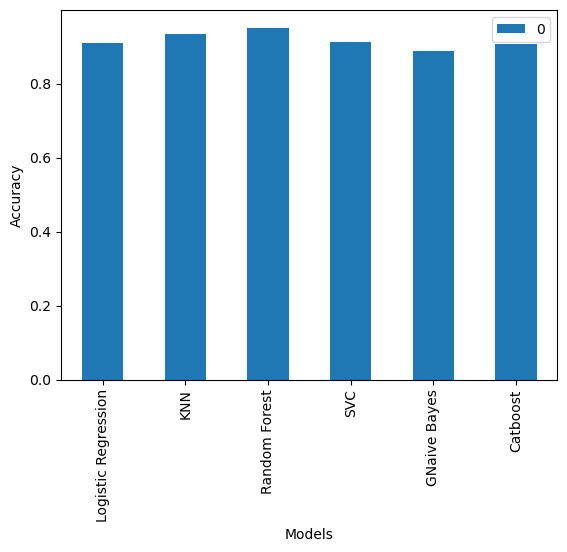

In [194]:
scores_cv.T.plot.bar()
plt.xlabel("Models")
plt.ylabel("Accuracy")

In [195]:
df

,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,0,5,8,0.7,6.900000,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,1.0
1,1,0,5,8,1.0,13.000000,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,1.0
2,1,0,5,8,2.0,100.000000,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,1.0
3,1,0,5,8,2.4,155.500000,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,1.0
4,1,0,2,0,0.6,8.500000,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,8,2,18,0,2.8,110.000000,670.0,92.0,130.0,115.0,80.0,115.0,138.0,3.0,0.0
1024,8,2,7,17,2.9,785.000000,720.0,92.0,130.0,145.0,80.0,145.0,128.0,3.0,0.0
1025,8,2,7,0,2.9,210.000000,670.0,92.0,130.0,115.0,80.0,115.0,138.0,3.0,0.0
1026,8,2,8,15,20.0,950.000000,690.0,140.0,85.0,95.0,145.0,95.0,130.0,3.0,0.0


In [196]:
from sklearn.model_selection import GridSearchCV

grid_params={
    "n_estimators": np.arange(10,100,10),
    "max_depth": [None, 10],
    "min_samples_split": np.arange(2,20,5),
    "min_samples_leaf": np.arange(1,10,5),
    "max_features": ['sqrt', 'log2', None],
    "max_leaf_nodes":[None, 1,5]
}

In [198]:
RandomForest_gs= GridSearchCV(RandomForestClassifier(), param_grid=grid_params,refit=True, cv=5,verbose=True)
RandomForest_gs.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [None, 1, 5],
                         'min_samples_leaf': array([1, 6]),
                         'min_samples_split': array([ 2,  7, 12, 17]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             verbose=True)

In [199]:
RandomForest_gs.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30}

In [200]:
RandomForest_gs.score(X_test, y_test)

0.9902912621359223

After gridsearchCV we attained an accuracy of 99%

In [201]:
import joblib
joblib.dump(RandomForest_gs, "Models/pokemonClassifier.joblib")

['Models/pokemonClassifier.joblib']

In [202]:
import joblib
model= joblib.load("Models/pokemonClassifier.joblib")

In [203]:
model.score(X_test, y_test)

0.9902912621359223

In [224]:
df_2= pd.read_csv("pokedex_(Update_05.20).csv")
df_2.drop(columns=["japanese_name", 'german_name','base_friendship','ability_1', 'ability_2', 
                   'ability_hidden',"abilities_number" , 'base_experience', 'egg_type_number','egg_type_1', 
                   'egg_type_2', 'percentage_male', 'egg_cycles', "species", "type_number","Unnamed: 0"], axis=1, inplace=True)
df_2.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,Grass,Poison,0.7,6.9,318.0,45.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,Grass,Poison,1.0,13.0,405.0,60.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,Grass,Poison,2.0,100.0,525.0,80.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,1,Normal,Grass,Poison,2.4,155.5,625.0,80.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,Fire,NaN,0.6,8.5,309.0,39.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [285]:
%matplotlib inline
import plotly.express as px
fig =px.scatter(df_2, x='generation', y='total_points',color='status', hover_name='name')
fig.show()

In [239]:
model.score(X_test, y_test)

0.9902912621359223

In [240]:
y_preds= model.predict(X_test)

In [241]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [242]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

In [246]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       180
           1       0.91      0.91      0.91        11
           2       1.00      1.00      1.00        10
           3       1.00      0.80      0.89         5

    accuracy                           0.99       206
   macro avg       0.98      0.93      0.95       206
weighted avg       0.99      0.99      0.99       206



Since our targeted accuracy of 98% is achieved, therefore, the training was successful

## Taking input

In [247]:
df.head()

,generation,status,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,0,5,8,0.7,6.9,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,1.0
1,1,0,5,8,1.0,13.0,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,1.0
2,1,0,5,8,2.0,100.0,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,1.0
3,1,0,5,8,2.4,155.5,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,1.0
4,1,0,2,0,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,1.0


In [262]:
df.shape

(1028, 15)

In [263]:
X

,generation,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate
0,1,5,8,0.7,6.900000,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,1.0
1,1,5,8,1.0,13.000000,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,1.0
2,1,5,8,2.0,100.000000,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,1.0
3,1,5,8,2.4,155.500000,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,1.0
4,1,2,0,0.6,8.500000,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,8,18,0,2.8,110.000000,670.0,92.0,130.0,115.0,80.0,115.0,138.0,3.0,0.0
1024,8,7,17,2.9,785.000000,720.0,92.0,130.0,145.0,80.0,145.0,128.0,3.0,0.0
1025,8,7,0,2.9,210.000000,670.0,92.0,130.0,115.0,80.0,115.0,138.0,3.0,0.0
1026,8,8,15,20.0,950.000000,690.0,140.0,85.0,95.0,145.0,95.0,130.0,3.0,0.0


In [259]:
for i in range(len(growth_array)):
    print(i, ": ", growth_array[i])

0 :  Slow
1 :  Medium Slow
2 :  Medium Fast
3 :  Fast
4 :  Erratic
5 :  Fluctuating
6 :  nan


In [258]:
for i in range(len(type_array)):
    print(i, ": ", type_array[i])

0 :  none
1 :  Normal
2 :  Fire
3 :  Water
4 :  Electric
5 :  Grass
6 :  Ice
7 :  Fighting
8 :  Poison
9 :  Ground
10 :  Flying
11 :  Psychic
12 :  Bug
13 :  Rock
14 :  Ghost
15 :  Dragon
16 :  Dark
17 :  Steel
18 :  Fairy


In [276]:
a1= input("Enter Generation (1 to 8):")
a2= input("Enter first type of the pokemon (use the type chart for reference):")
a3= input("Enter second type: ")
a4= input("Enter the height in meters: ")
a5= input("Enter the weight in kilograms: ")
a6= input("Enter base stat total: ")
a7= input("Enter HP: ")
a8= input("Enter Attack: ")
a9= input("Enter Defence: ")
a10= input("Enter Special Attack: ")
a11= input("Enter Special Defence: ")
a12= input("Enter Speed: ")
a13= input("Enter catch rate: ")
a14= input("Enter growth rate (use the growth rate chart for refence): ")


input_array= np.array([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14]).reshape(1,-1)

Enter Generation (1 to 8):3
Enter first type of the pokemon (use the type chart for reference):15
Enter second type: 10
Enter the height in meters: 20
Enter the weight in kilograms: 120
Enter base stat total: 680
Enter HP: 100
Enter Attack: 150
Enter Defence: 90
Enter Special Attack: 150
Enter Special Defence: 90
Enter Speed: 100
Enter catch rate: 3
Enter growth rate (use the growth rate chart for refence): 0


In [277]:
input_array= input_array.astype(int)

In [278]:
result=model.predict(input_array)

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [282]:
def predict_status(result):
    if result==0:
        return "Normal Pokemon"
    elif result==1:
        return "Sub Legendary pokemon/ Ultra beast"
    elif result==2:
        return "Legendary Pokemon"
    else:
        return "Mythical Pokemon"


In [283]:
status= predict_status(result[0])
status

'Legendary Pokemon'